In [33]:
# import libraries

import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Activation, Flatten
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D
import os

In [34]:
# setup credentials (DUMMY VALUES HERE!!)

fromaddr = "test@gmail.com"  # your email address
password = "importkeras" # password
toaddr = "yourname@gmail,com" # senders email address

# init message body

msg = MIMEMultipart()
msg['From'] = fromaddr
msg['To'] = toaddr
msg['Subject'] = "Deep Alert"

In [39]:
# model params

batch_size = 32
num_classes = 10
epochs = 20

# directory
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar.h5'

# load the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# convert to metrics
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [36]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [37]:
# create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# set optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# compile model
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 64)        18496     
__________

In [40]:
# convert and normalize

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [41]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 270s 5ms/step - loss: 1.8178 - acc: 0.3320 - val_loss: 1.6072 - val_acc: 0.4344
Epoch 2/20
50000/50000 [==============================] - 274s 5ms/step - loss: 1.5217 - acc: 0.4509 - val_loss: 1.3516 - val_acc: 0.5165
Epoch 3/20
50000/50000 [==============================] - 275s 5ms/step - loss: 1.3737 - acc: 0.5064 - val_loss: 1.3645 - val_acc: 0.5271
Epoch 4/20
50000/50000 [==============================] - 275s 5ms/step - loss: 1.2756 - acc: 0.5460 - val_loss: 1.1805 - val_acc: 0.5861
Epoch 5/20
50000/50000 [==============================] - 273s 5ms/step - loss: 1.1994 - acc: 0.5763 - val_loss: 1.1319 - val_acc: 0.5992
Epoch 6/20
50000/50000 [==============================] - 273s 5ms/step - loss: 1.1364 - acc: 0.5993 - val_loss: 1.0455 - val_acc: 0.6360
Epoch 7/20
50000/50000 [==============================] - 270s 5ms/step - loss: 1.0817 - acc: 0.6166 - val_loss: 0.9981 - 

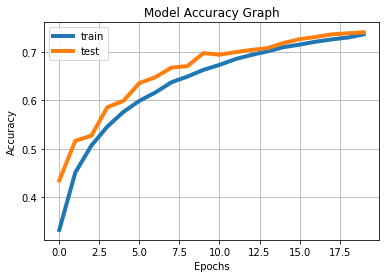

In [42]:
# summarize history for accuracy

plt.plot(history.history['acc'],linewidth=4)
plt.plot(history.history['val_acc'],linewidth=4)
plt.title('Model Accuracy Graph')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid(True)
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy', dpi=300)
plt.show()

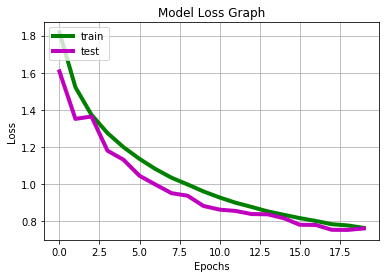

In [43]:
# summarize history for loss

plt.plot(history.history['loss'],'-g', linewidth=4)
plt.plot(history.history['val_loss'],'-m', linewidth=4)
plt.title('Model Loss Graph')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid(True)
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss', dpi=300)
plt.show()

In [45]:
# get the model values

l = history.history['loss'][-1]   # loss
a = history.history['acc'][-1]    # acc

vl = history.history['val_loss'][-1]  # validation loss
va = history.history['val_acc'][-1]   # validation accuracy

print("Accuracy: " + str(a))
print("Loss: " + str(l))
print("Validation accuracy: " + str(va))
print("Validation Loss: " + str(vl))

Accuracy: 0.7369
Loss: 0.7650491550254822
Validation accuracy: 0.7413
Validation Loss: 0.7621852181434632


In [46]:
# this is the message body to be emailed

body = "The mythical model configurations! \n\n" + "Acc: " + str(a)[:5] + " \n" + "Loss: " + str(l)[:5] + " \n" + "Val_acc: " + str(va)[:5] + " \n" + "Val_loss: " + str(vl)[:5] + " \n"
print(body)

The mythical model configurations! 

Acc: 0.736 
Loss: 0.765 
Val_acc: 0.741 
Val_loss: 0.762 



In [47]:
# attach message body

msg.attach(MIMEText(body, 'plain'))

# load the saved graphs

filenames = ["accuracy.png", "loss.png"]

# add the images as attachments 
# convert to base64 string

for f in filenames:
    attachment = open(f, "rb")
    part = MIMEBase('application', 'octet-stream')
    part.set_payload((attachment).read())
    encoders.encode_base64(part)
    part.add_header('Content-Disposition', "attachment; filename= %s" % f)
    msg.attach(part)


In [48]:
# start the server

server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()
 
# login with email and pass

server.login(fromaddr, PASSWORD)
text = msg.as_string()

# send to destionation

server.sendmail(fromaddr, toaddr, text)
server.quit()
print("Sent!")

Sent!
